# Data Ingestion

In [2]:
import numpy as np
import pandas as pd

In [3]:
df_train = pd.read_csv("./data/churnTrain.csv")
df_test = pd.read_csv("./data/churnTest.csv")

In [4]:
pd.__version__

'0.23.4'

## Data Exploration

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State                  3333 non-null object
Account_Length         3333 non-null int64
Area_Code              3333 non-null int64
Phone_No               3333 non-null int64
International_Plan     3333 non-null object
Voice_Mail_Plan        3333 non-null object
No_Vmail_Messages      3333 non-null int64
Total_Day_minutes      3333 non-null float64
Total_Day_Calls        3333 non-null int64
Total_Day_charge       3333 non-null float64
Total_Eve_Minutes      3333 non-null float64
Total_Eve_Calls        3333 non-null int64
Total_Eve_Charge       3333 non-null float64
Total_Night_Minutes    3333 non-null float64
Total_Night_Calls      3333 non-null int64
Total_Night_Charge     3333 non-null float64
Total_Intl_Minutes     3333 non-null float64
Total_Intl_Calls       3333 non-null int64
Total_Intl_Charge      3333 non-null float64
No_CS_Calls            3333 non-null int64
Churn         

In [7]:
df_train.head(5)

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,...,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn
0,KS,128,415,3824657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,3717191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,3581921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,3759999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,3306626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


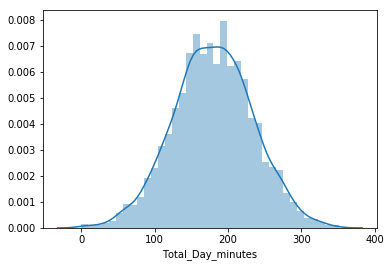

In [8]:
sns.distplot(df_train['Total_Day_minutes'])

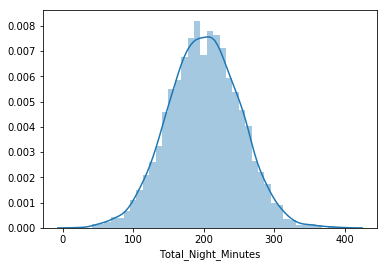

In [9]:
sns.distplot(df_train['Total_Night_Minutes'])

## Encode binary categorical columns to bool

In [10]:
di = {" yes": True, " no": False}

In [11]:
df_train.replace({"International_Plan": di}, inplace=True)

In [12]:
df_train.replace({"Voice_Mail_Plan": di}, inplace=True)

In [13]:
df_train.head(5)

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,...,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn
0,KS,128,415,3824657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,3717191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,3581921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,3759999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,3306626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [14]:
df_train["International_Plan"].unique()

array([False,  True])

In [15]:
df_train['International_Plan'].value_counts()

False    3010
True      323
Name: International_Plan, dtype: int64

In [16]:
df_train['Voice_Mail_Plan'].value_counts()

False    2411
True      922
Name: Voice_Mail_Plan, dtype: int64

## Missing Values

It turned out that there are no missing values in the dataframe.

In [17]:
 len(df_train.index)-df_train.count()

State                  0
Account_Length         0
Area_Code              0
Phone_No               0
International_Plan     0
Voice_Mail_Plan        0
No_Vmail_Messages      0
Total_Day_minutes      0
Total_Day_Calls        0
Total_Day_charge       0
Total_Eve_Minutes      0
Total_Eve_Calls        0
Total_Eve_Charge       0
Total_Night_Minutes    0
Total_Night_Calls      0
Total_Night_Charge     0
Total_Intl_Minutes     0
Total_Intl_Calls       0
Total_Intl_Charge      0
No_CS_Calls            0
Churn                  0
dtype: int64

## Feature Selection, Feature Engineering 

- We eliminated the column 'Phone_No', since similar to "ID", it's unique for each sample and doesn't provide any information for training. 

- We also eliminated the 'State' column, which is correlates to 'Area_Code'

In [18]:
df_train.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone_No',
       'International_Plan', 'Voice_Mail_Plan', 'No_Vmail_Messages',
       'Total_Day_minutes', 'Total_Day_Calls', 'Total_Day_charge',
       'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'No_CS_Calls', 'Churn'],
      dtype='object')

In [19]:
predictors = ['Account_Length', 'Area_Code', 
       'International_Plan', 'Voice_Mail_Plan', 'No_Vmail_Messages',
       'Total_Day_minutes', 'Total_Day_Calls', 'Total_Day_charge',
       'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'No_CS_Calls']

In [20]:
target = 'Churn'

In [21]:
X = df_train[predictors].values
y = df_train[target].values

In [22]:
y = np.squeeze(y)

## Build the model

In [23]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, f1_score 

### XGBoost

XGBoost is a type of Gradient Booosting Modeling that is highly efficient, flexible and portable. It has been the winning algorithms in many Kagglg, KDDCup compititions and the Netflix challenge. 

In [24]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))

[[2840   10]
 [  94  389]]


In [25]:
?xgb.XGBClassifier

In [26]:
y_pred_proba_xgboost = xgb_model.predict_proba(X)

### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=123)
random_forest_model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [28]:
y_pred_proba_rf = random_forest_model.predict_proba(X)

In [29]:
y_pred_proba_rf

array([[0.69596974, 0.30403026],
       [0.89691794, 0.10308206],
       [0.87884536, 0.12115464],
       ...,
       [0.87522668, 0.12477332],
       [0.81918672, 0.18081328],
       [0.85822112, 0.14177888]])

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logistic_regression_model = LogisticRegression(random_state=123, solver='newton-cg')
logistic_regression_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred_proba_lr = logistic_regression_model.predict_proba(X)

In [33]:
y_pred_proba_lr

array([[0.89358476, 0.10641524],
       [0.95541374, 0.04458626],
       [0.93762257, 0.06237743],
       ...,
       [0.79084132, 0.20915868],
       [0.7338228 , 0.2661772 ],
       [0.91567193, 0.08432807]])

## Model Comparison

We will compare the 3 models (XGBoost, Random Forest and Logistic Regression) by obeserving metrics from **ROC** (*Receiver Operating Characteristic*) curve and **PR** (*Precision Recall*) curve

In [34]:
pred_probas = {'xgboost': y_pred_proba_xgboost, 
              'random_forest': y_pred_proba_rf,
              'logistic_regression': y_pred_proba_lr}

### ROC Curve

As you have seen in earlier section, classification models usually predict the probability (a number between 0 and 1) of a sample being "positive". In our case, "positive" is that the customer churns. When a classification model predicts the target variable's class, it uses a "threshold probability" to make the decision. If the probably of the sample being "positive" is larger than the threshold, then it is classfied as "positive"; otherwise it is classified as "negative".

It is important to understand concepts such as: *true positive rate*, *false positive rate*. 

- **true positive rate**: Number correctly predicticted positive / Number of actual positive 
- **false positive rate**: Number of falsely predicted positive / Number of actual negative

In [35]:
fpr, tpr, thresholds = [],[],[]
area_under_curve = []
my_models = []
for key in pred_probas:
    f,t,th = roc_curve(y, pred_probas[key][:,1], pos_label=True)
    my_models.append(key)
    area_under_curve.append(auc(f, t))
    fpr.append(f)
    tpr.append(t)
    thresholds.append(th)

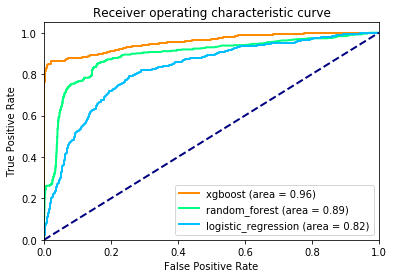

In [36]:
colors = ['darkorange', 'springgreen', 'deepskyblue']
lw = 2
for i in range(len(fpr)):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             lw=lw, label= my_models[i] + ' (area = %0.2f)' %area_under_curve[i])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")

### Precision-Recall Curve

Precision-Recall curve is better suited than ROC curve to evaluate different modesl for imbalanced data sets. See

- J. Davis, M. Goadrich *The relationship between precision-recall and roc curves*
- T. Saito, M. Rehmsmeier *The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets*

In [37]:
precision, recall, thresholds = [],[],[]
area_under_curve = []
my_models = []
for key in pred_probas:
    p,r,th = precision_recall_curve(y, pred_probas[key][:,1], pos_label=True)
    my_models.append(key)
    area_under_curve.append(auc(r, p))
    precision.append(p)
    recall.append(r)
    thresholds.append(th)

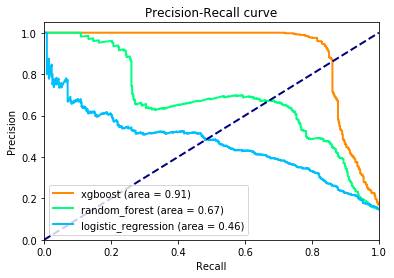

In [39]:
colors = ['darkorange', 'springgreen', 'deepskyblue']
lw = 2
for i in range(len(precision)):
    plt.plot(recall[i], precision[i], color=colors[i],
             lw=lw, label= my_models[i] + ' (area = %0.2f)' %area_under_curve[i])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

In [7]:
df_train['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

## Survival Analysis

To estimate S(t) = Pr(T > t) -- how long a customer will remain to be a customer

In [1]:
from lifelines import KaplanMeierFitter

In [4]:
df = pd.read_csv("./data/telco-customer-churn.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
my_dict = {"Yes": True, "No": False}
df.replace({"Churn": my_dict}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null bool
dtypes: bool(1), float64(1), int64(

### Overall customer churn estimate

The following plots show the probably a customer is still with the telecommunication business after being a customer for them after certain number of months. 

We are using Kaplan-Meier Estimate in the following analysis

Text(0.5, 1.0, 'Overall customer churn')

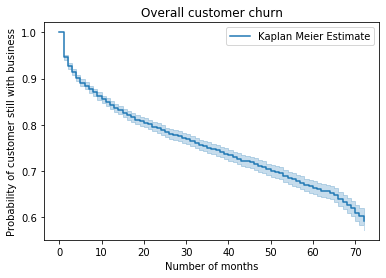

In [25]:
km_overall = KaplanMeierFitter() 
km_overall.fit(df['tenure'], df['Churn'], label='Kaplan Meier Estimate')
km_overall.plot()
plt.xlabel('Number of months')
plt.ylabel('Probability of customer still with business')
plt.title('Overall customer churn')

The following anaysis shows that gender doesn't affect the customer churn much

Text(0.5, 1.0, 'Gender impact on customer churn')

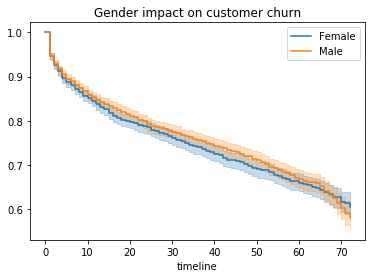

In [20]:
kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

## Two Cohorts are compared. 1. Streaming TV Not Subsribed by Users, 2. Streaming TV subscribed by the users.
groups = df['gender']   
cohort1 = (groups == 'Female')      ## group i1 , having the pandas series for the 1st cohort
cohort2 = (groups == 'Male')     ## group i2 , having the pandas series for the 2nd cohort


## fit the model for 1st cohort
kmf1.fit(df['tenure'][cohort1], df['Churn'][cohort1], label='Female')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(df['tenure'][cohort2], df['Churn'][cohort2], label='Male')
kmf1.plot(ax=a1)
plt.title('Gender impact on customer churn')

The following anaysis shows that tech support has a pretty big impact on customer churn much

Text(0.5, 1.0, 'Tech support impact on customer churn')

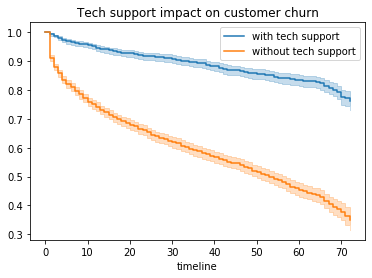

In [24]:
kmf2 = KaplanMeierFitter() ## instantiate the class to create an object

## Two Cohorts are compared. 1. Streaming TV Not Subsribed by Users, 2. Streaming TV subscribed by the users.
groups = df['TechSupport']   
cohort1 = (groups == 'Yes')      ## group i1 , having the pandas series for the 1st cohort
cohort2 = (groups == 'No')     ## group i2 , having the pandas series for the 2nd cohort


## fit the model for 1st cohort
kmf2.fit(df['tenure'][cohort1], df['Churn'][cohort1], label='with tech support')
a1 = kmf2.plot()

## fit the model for 2nd cohort
kmf2.fit(df['tenure'][cohort2], df['Churn'][cohort2], label='without tech support')
kmf2.plot(ax=a1)
plt.title("Tech support impact on customer churn")